#Simulated Annealing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(42)

Objective Function (difficult2minimafcn1D):

- Piecewise function with two minima

- Global minimum is non-trivial to find due to different behaviors in different regions

In [ ]:
def difficult2minimafcn1D(x):
    """
    Function with two minima in 1D where the global minimum is difficult to find.

    Mathematical definition:
        f(x) = -exp(-(x/100)^2)               for x ≤ 100
               -exp(-1) + (x-100)(x-102)       for x > 100

    Parameters:
        x : numpy array or float
            Input value(s) at which to evaluate the function

    Returns:
        y : numpy array or float
            Function value(s) at input x
    """
    x = np.asarray(x) if isinstance(x, (list, tuple, np.ndarray)) else np.array([x])
    y = np.zeros_like(x)
    mask_le100 = x <= 100
    y[mask_le100] = -np.exp(-(x[mask_le100]/100)**2)
    mask_gt100 = x > 100
    y[mask_gt100] = -np.exp(-1) + (x[mask_gt100]-100)*(x[mask_gt100]-102)
    return y.item() if y.size == 1 else y

Perturbation Function (perturb):

- Generates new candidate solutions by adding random noise

- Ensures solutions stay within specified bounds using clipping

In [ ]:
def perturb(current_x, a, b):
    """
    Perturbs the current solution by adding a random value within bounds.

    Parameters:
        current_x : float
            Current solution
        a : float
            Lower bound of search space
        b : float
            Upper bound of search space

    Returns:
        new_x : float
            Perturbed solution within bounds [a, b]
    """
    new_x = current_x + 0.2*(b-a)*(np.random.random()-0.5)
    # Ensure the new solution stays within bounds
    new_x = np.clip(new_x, a, b)
    return new_x

Simulated Annealing Core (SA_RE_1D):

- Cooling Schedule: Exponential decay of temperature

- Acceptance Criterion:

    - Always accepts better solutions

    - May accept worse solutions with probability decreasing with temperature

- Visualization: Shows temperature decay, objective function, and search progress

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def SA_RE_1D(f, a, b, niter, lambda_, dispAndPlot=False):
    time = np.arange(1, niter + 1)
    temperature = np.exp(-lambda_ * time)

    x1 = np.random.random() * (b - a) + a
    y1 = f(x1)

    current_x = x1
    current_y = y1

    best_x = x1
    best_y = y1

    if dispAndPlot:
        fig, axs = plt.subplots(1, 3, figsize=(21, 5))

        # Temperature plot
        axs[0].plot(time, temperature, color='teal', lw=2)
        axs[0].set_title('Cooling Schedule (Temperature vs Iteration)')
        axs[0].set_xlabel('Iteration')
        axs[0].set_ylabel('Temperature')
        axs[0].grid(True)

        # Function plot
        domain = np.linspace(a, b, 1000)
        axs[1].plot(domain, f(domain), 'b-', label='Objective Function')
        axs[1].set_title('Objective Function Landscape')
        axs[1].set_xlabel('x')
        axs[1].set_ylabel('f(x)')
        axs[1].grid(True)
        axs[1].legend()

        # SA progress plot
        axs[2].plot(domain, f(domain), 'blue', label='Objective Function')
        axs[2].plot(x1, y1, 'ks', label='Initial Solution')
        axs[2].set_title('Simulated Annealing Progress')
        axs[2].set_xlabel('x')
        axs[2].set_ylabel('f(x)')
        axs[2].grid(True)

        colmap = plt.cm.plasma(np.linspace(0, 1, niter))

    for i in range(1, niter):
        new_x = perturb(current_x, a, b)
        new_y = f(new_x)

        if (new_y < current_y) or (np.random.random() < temperature[i]):
            current_x = new_x
            current_y = new_y

        if new_y < best_y:
            best_x = new_x
            best_y = new_y

        if dispAndPlot:
            axs[2].scatter(new_x, new_y, color=colmap[i], s=20, alpha=0.8)
            axs[2].plot([current_x, new_x], [current_y, new_y], '--', color=colmap[i], lw=0.5, alpha=0.5)

            if i % 50 == 0:
                print(f'Iteration {i:4d}: best_x = {best_x:.4f}, best_y = {best_y:.4f}, '
                      f'current_x = {current_x:.4f}, current_y = {current_y:.4f}')

    if dispAndPlot:
        axs[2].plot(best_x, best_y, 'r*', markersize=12, label='Best Found')
        axs[2].legend()
        plt.tight_layout()
        plt.show()

    return best_x, best_y


Examples

Example 1: Minimizing difficult2minimafcn1D
Iteration   50: best_x = 1.3098, best_y = -0.9998, current_x = -4.1192, current_y = -0.9983
Iteration  100: best_x = -0.1500, best_y = -1.0000, current_x = -1.4479, current_y = -0.9998
Iteration  150: best_x = -0.1500, best_y = -1.0000, current_x = -2.4333, current_y = -0.9994
Iteration  200: best_x = -0.1500, best_y = -1.0000, current_x = -10.0000, current_y = -0.9900
Iteration  250: best_x = -0.1500, best_y = -1.0000, current_x = -0.5461, current_y = -1.0000
Iteration  300: best_x = 0.0799, best_y = -1.0000, current_x = 1.0124, current_y = -0.9999
Iteration  350: best_x = 0.0799, best_y = -1.0000, current_x = 0.8463, current_y = -0.9999
Iteration  400: best_x = -0.0005, best_y = -1.0000, current_x = -0.2706, current_y = -1.0000
Iteration  450: best_x = -0.0005, best_y = -1.0000, current_x = 0.2507, current_y = -1.0000


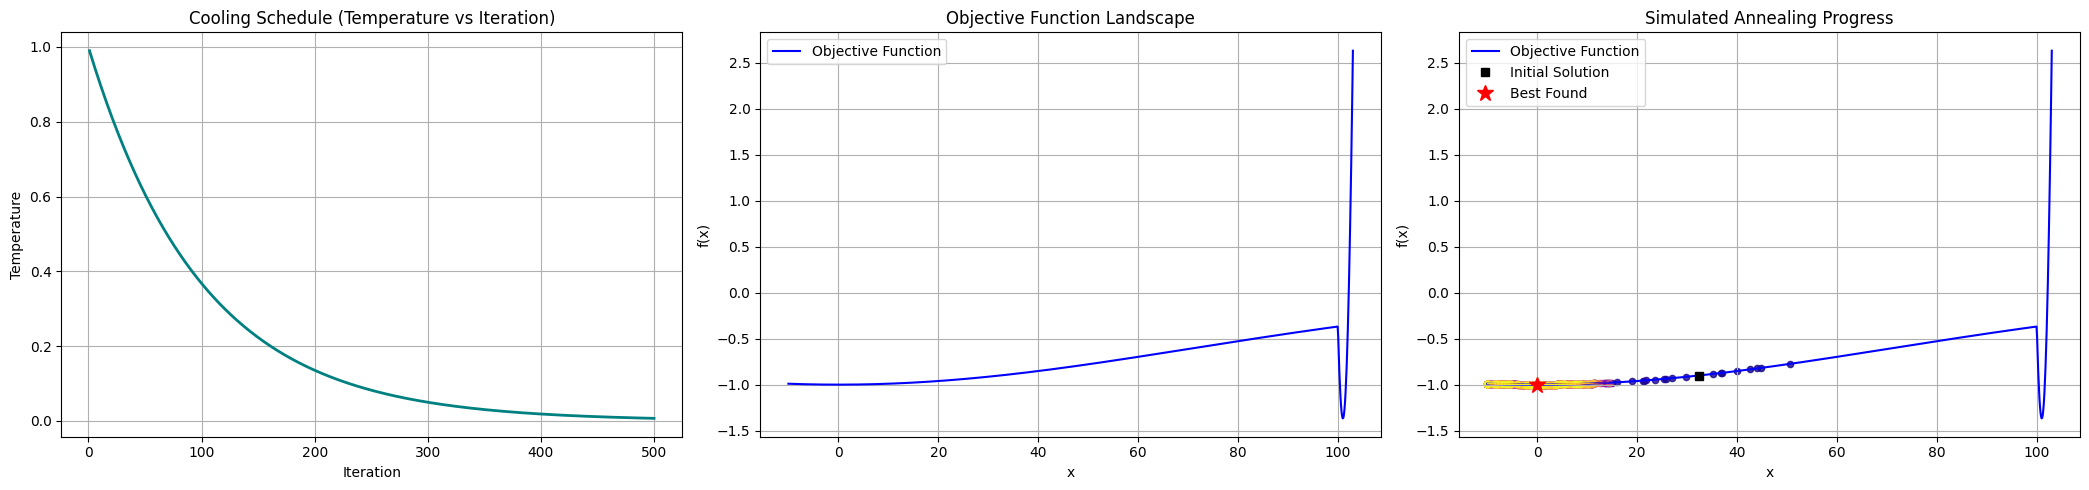

Found minimum at x = -0.0005, y = -1.0000


In [ ]:
# Example 1: Minimizing the difficult 1D function
print("Example 1: Minimizing difficult2minimafcn1D")
a = -10
b = 103
best_x, best_y = SA_RE_1D(difficult2minimafcn1D, a, b,
                         niter=500, lambda_=0.01, dispAndPlot=True)
print(f"Found minimum at x = {best_x:.4f}, y = {best_y:.4f}")


Example 2: Rastrigin function
Iteration   50: best_x = 0.0673, best_y = 0.8842, current_x = -2.1537, current_y = 8.9496
Iteration  100: best_x = 0.0673, best_y = 0.8842, current_x = -0.0754, current_y = 1.1057
Iteration  150: best_x = 0.0570, best_y = 0.6389, current_x = 0.9192, current_y = 2.1074
Iteration  200: best_x = 0.0414, best_y = 0.3382, current_x = 0.0414, current_y = 0.3382
Iteration  250: best_x = -0.0122, best_y = 0.0294, current_x = 0.1388, current_y = 3.5871
Iteration  300: best_x = 0.0065, best_y = 0.0083, current_x = 0.0065, current_y = 0.0083
Iteration  350: best_x = 0.0065, best_y = 0.0083, current_x = 0.0324, current_y = 0.2074
Iteration  400: best_x = 0.0065, best_y = 0.0083, current_x = -0.0209, current_y = 0.0869
Iteration  450: best_x = 0.0065, best_y = 0.0083, current_x = -0.0209, current_y = 0.0869
Iteration  500: best_x = -0.0021, best_y = 0.0009, current_x = -0.0021, current_y = 0.0009
Iteration  550: best_x = -0.0021, best_y = 0.0009, current_x = -0.0021, 

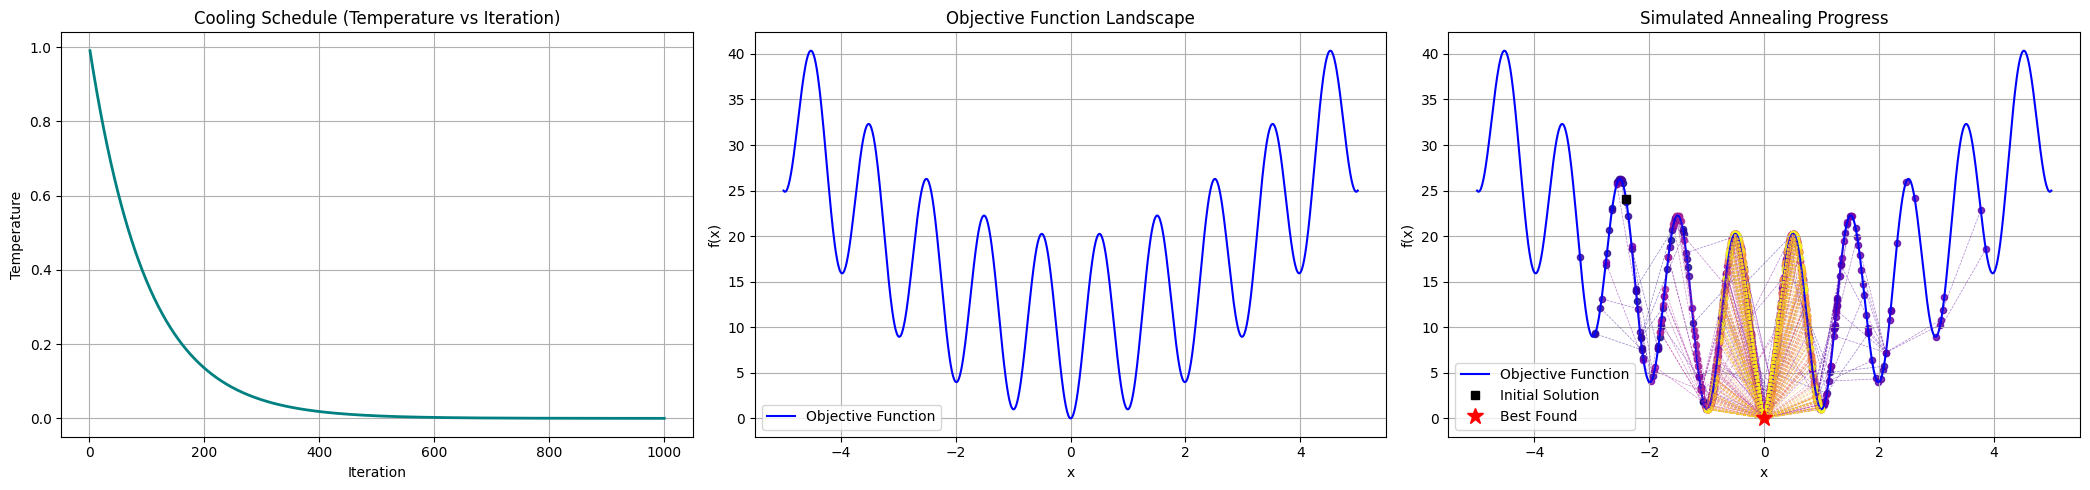

Found minimum at x = 0.0004, y = 0.0000
Known optimum: x = 0.0, y = 0.0


In [ ]:
# Example 2: Rastrigin function (known optimum at x=0, y=0)
print("\nExample 2: Rastrigin function")
rastrigin = lambda x: 10 + x**2 - 10*np.cos(2*np.pi*x)
a, b = -5, 5
best_x, best_y = SA_RE_1D(rastrigin, a, b,
                         niter=1000, lambda_=0.01, dispAndPlot=True)
print(f"Found minimum at x = {best_x:.4f}, y = {best_y:.4f}")
print("Known optimum: x = 0.0, y = 0.0")



Example 3: Sinusoidal function
Iteration   50: best_x = 5.2103, best_y = -1.8747, current_x = 7.0784, current_y = -0.2854
Iteration  100: best_x = 5.2103, best_y = -1.8747, current_x = 7.2741, current_y = 0.0621
Iteration  150: best_x = 5.2103, best_y = -1.8747, current_x = 6.6648, current_y = 0.1494
Iteration  200: best_x = 5.1883, best_y = -1.8888, current_x = 5.2822, current_y = -1.7886
Iteration  250: best_x = 5.1883, best_y = -1.8888, current_x = 2.4689, current_y = 1.5534
Iteration  300: best_x = 5.1883, best_y = -1.8888, current_x = 3.3849, current_y = -1.1999
Iteration  350: best_x = 5.1883, best_y = -1.8888, current_x = 2.9742, current_y = -0.3032
Iteration  400: best_x = 5.1883, best_y = -1.8888, current_x = 3.3915, current_y = -1.1998
Iteration  450: best_x = 5.1883, best_y = -1.8888, current_x = 3.3915, current_y = -1.1998


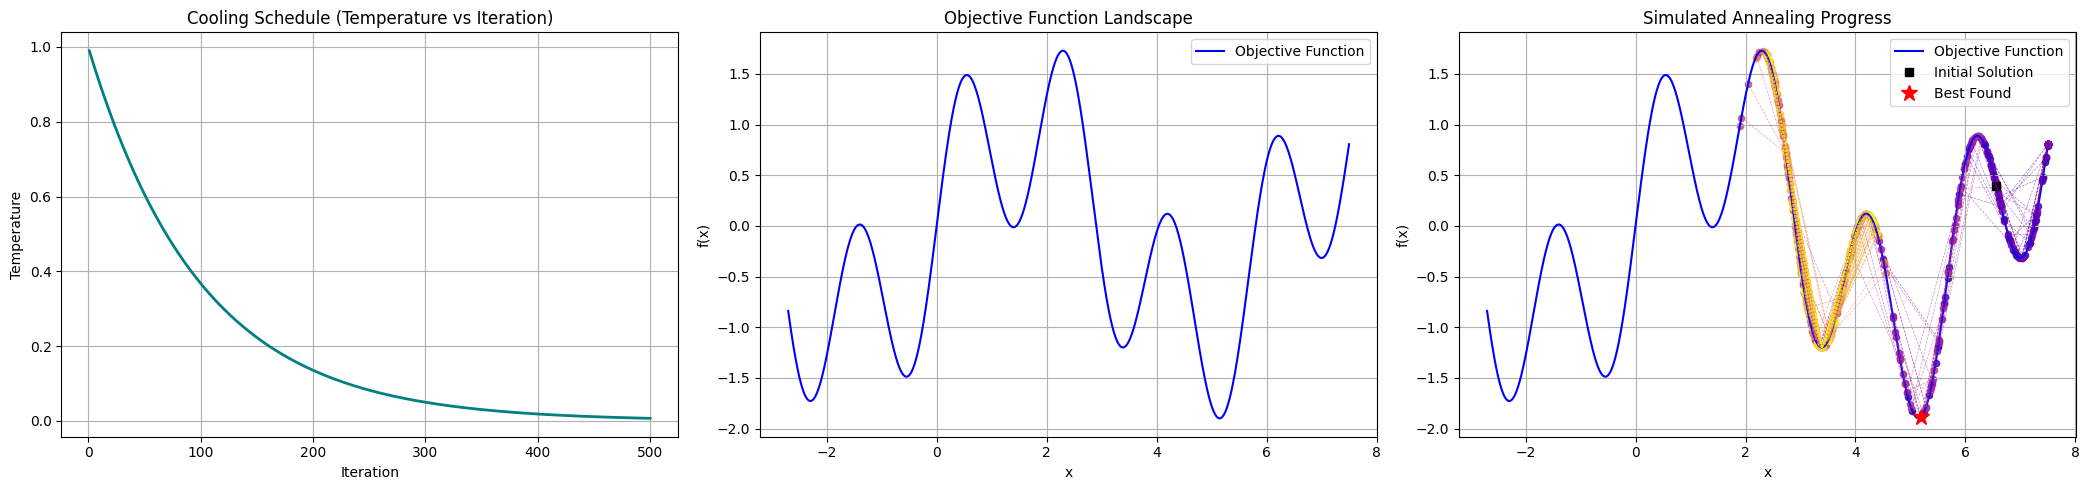

Found minimum at x = 5.1883, y = -1.8888
Known optimum: x ≈ 5.145735, y ≈ -1.8996


In [ ]:
# Example 3: Sinusoidal function (known optimum at x≈5.145735, y≈-1.8996)
print("\nExample 3: Sinusoidal function")
sin_func = lambda x: np.sin(x) + np.sin(10.0/3.0 * x)
a, b = -2.7, 7.5
best_x, best_y = SA_RE_1D(sin_func, a, b,
                         niter=500, lambda_=0.01, dispAndPlot=True)
print(f"Found minimum at x = {best_x:.4f}, y = {best_y:.4f}")
print("Known optimum: x ≈ 5.145735, y ≈ -1.8996")